In [1]:
# Importing modules 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,Activation,MaxPooling2D
from keras.models import Sequential
from keras.models import load_model
from sklearn.model_selection import train_test_split

np.random.seed(1)

In [2]:
# Processing training data
# -> appending images in a list 'train_images'
# -> appending labels in a list 'train_labels'

train_images = []       
train_labels = []
shape = (100,100)  
train_path = 'Data/train'

for filename in os.listdir(train_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        
        try:
            # Resize all images to a specific shape
            img = cv2.resize(img,shape)

            # Spliting file names and storing the labels for image in list
            train_labels.append(filename.split('_')[0])

            train_images.append(img)
        except:
            pass
# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [3]:
# Processing testing data
# -> appending images in a list 'test_images'
# -> appending labels in a list 'test_labels'
# The test data contains labels as well also we are appending it to a list but we are'nt going to use it while training.

test_images = []
test_labels = []
test_path = 'Data/test'

for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
        # Spliting file names and storing the labels for image in list
        test_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        test_images.append(img)
        
# Converting test_images to array
test_images = np.array(test_images)

[0 0 1 0 0]


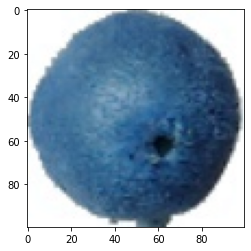

In [4]:
# Visualizing Training data
print(train_labels[0])
plt.imshow(train_images[0])

In [9]:
def show_image(index):
    print(train_labels[index])
    #plt.imshow(test_images[index])
    cv2.imshow('win',train_images[index])
    cv2.waitKey(0)
    cv2.destroyAllWindows()
show_image(1)

[0 0 0 0 1]


[0 0 0 0 1]


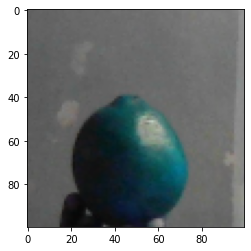

In [5]:
# Visualizing Training data
print(train_labels[4])
plt.imshow(train_images[4])

In [6]:
#Building model 1 using customized convolutional and pooling layers

model = Sequential()

#input_shape is 100*100 since thats the dimension of each of the fruit images
model.add(Conv2D(filters = 32, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

# specifying parameters for fully connected layer
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(3,activation = 'softmax'))


In [7]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      416       
_________________________________________________________________
activation (Activation)      (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0

## Training takes 10 minutes     Hold your horses!!!!!

In [8]:
from keras.optimizers import SGD, Adam, RMSprop

optimizer = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [9]:
# fitting model using above defined layers 
CNN_model = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val),
        verbose=2, shuffle=True)

Epoch 1/50
8/8 - 2s - loss: 17.6313 - accuracy: 0.4447 - val_loss: 1.1123 - val_accuracy: 0.4692
Epoch 2/50
8/8 - 1s - loss: 0.9832 - accuracy: 0.6015 - val_loss: 0.5385 - val_accuracy: 0.6923
Epoch 3/50
8/8 - 1s - loss: 0.5692 - accuracy: 0.7789 - val_loss: 0.3626 - val_accuracy: 0.9077
Epoch 4/50
8/8 - 1s - loss: 0.4639 - accuracy: 0.8201 - val_loss: 0.2876 - val_accuracy: 0.9000
Epoch 5/50
8/8 - 1s - loss: 0.3212 - accuracy: 0.8920 - val_loss: 0.2043 - val_accuracy: 0.9615
Epoch 6/50
8/8 - 1s - loss: 0.2396 - accuracy: 0.9254 - val_loss: 0.1752 - val_accuracy: 0.9385
Epoch 7/50
8/8 - 1s - loss: 0.2255 - accuracy: 0.9203 - val_loss: 0.1156 - val_accuracy: 0.9692
Epoch 8/50
8/8 - 1s - loss: 0.1934 - accuracy: 0.9229 - val_loss: 0.1059 - val_accuracy: 0.9692
Epoch 9/50
8/8 - 1s - loss: 0.1481 - accuracy: 0.9563 - val_loss: 0.1047 - val_accuracy: 0.9615
Epoch 10/50
8/8 - 1s - loss: 0.1584 - accuracy: 0.9383 - val_loss: 0.0883 - val_accuracy: 0.9769
Epoch 11/50
8/8 - 1s - loss: 0.1126 - 

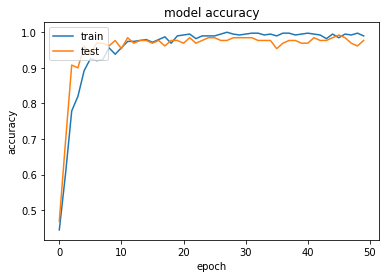

In [12]:
# summarize history for accuracy
plt.plot(CNN_model.history['accuracy'])
plt.plot(CNN_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

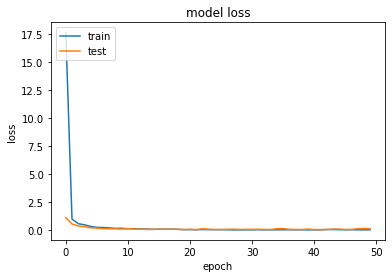

In [13]:
# summarize history for loss
plt.plot(CNN_model.history['loss'])
plt.plot(CNN_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
#Saving the model
model.save('newmodel.h5')
#loss: 0.0928 - acc: 0.9333 - val_loss: 0.7667 - val_acc: 0.8333


In [12]:
#Loading the model
model = load_model('newmodel.h5')
history  = CNN_model

In [13]:
# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

5/5 [==============================] - 0s 73ms/step - loss: 1.2873 - accuracy: 0.9231
[1.2873059511184692, 0.9230769276618958]


In [14]:
# Testing predictions and the actual label
checkImage = test_images[0:1]
checklabel = test_labels[0:1]

predict = model.predict(np.array(checkImage))

output = { 0:'apple',1:'banana',2:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Actual :-  ['apple']
Predicted :-  apple


# Testing by Ramkishor

In [15]:
def show_image(index):
    print(test_labels[index])
    #plt.imshow(test_images[index])
    cv2.imshow('win',test_images[index])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [16]:
# Testing predictions and the actual label
def test(index):
    checkImage = test_images[index:index+1]
    checklabel = test_labels[index:index+1]

    predict = model.predict(np.array(checkImage))

    output = { 0:'apple',1:'banana',2:'orange'}
    #print("Actual :- ",checklabel)
    #print("Predicted :- ",output[np.argmax(predict)])
    
    return checklabel,output[np.argmax(predict)]
    #show_image(index)


In [17]:
correct_count = 0
incorrect_count = 0
for i in range(10,len(test_images)):
    Actual,Predicted = test(i)

    
    if Actual[0] == Predicted:
        correct_count+=1
        #print(f"{Actual[0]} is predicted as {Predicted}")
        #show_image(i)
    else:
        incorrect_count+=1
        #print(f"{Actual[0]} is predicted as {Predicted}")
        #show_image(i)
print()
print(f"correct_count = {correct_count}")
print(f"incorrect_count = {incorrect_count}")


correct_count = 34
incorrect_count = 15


In [19]:
NewTestPath = 'DataExtended/NewTestData'
my_test_images=[]
my_test_labels=[]

for filename in os.listdir(NewTestPath):
        img = cv2.imread(os.path.join(NewTestPath,filename))
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
                
        # Spliting file names and storing the labels for image in list
        my_test_labels.append(filename.split('_')[0])
        

        my_test_images.append(img)


def test(index):
    checkImage = my_test_images[index:index+1]
    Actual = my_test_labels[index]
    predict = model.predict(np.array(checkImage))

    output = { 0:'apple',1:'banana',2:'orange'}
    #print("Actual :- ",checklabel)
    #print("Predicted :- ",output[np.argmax(predict)])
    
    return Actual,output[np.argmax(predict)]
    #show_image(index)
def show_image(index):
    #plt.imshow(test_images[index])
    cv2.imshow('win',my_test_images[i])
    cv2.waitKey(0)
    cv2.destroyAllWindows()


for i in range(len(my_test_images)):
    Actual,Predicted = test(i)
    print(f"{Actual} is predicted as {Predicted}")
    show_image(i)

apple is predicted as apple
apple is predicted as apple
banana is predicted as banana
banana is predicted as banana
banana is predicted as banana
banana is predicted as banana
banana is predicted as banana
orange is predicted as banana
orange is predicted as banana
orange is predicted as orange
orange is predicted as orange
orange is predicted as banana
